<a href="https://colab.research.google.com/github/dmc-mcc/DSI/blob/main/projectwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import time
import datetime
from scipy.stats import shapiro, kstest, norm
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from functools import reduce
import pandas as pd

# **1-4**

In [ ]:
def download_historical_data(symbol, start_date, end_date):
    try:
        # Download historical data from Yahoo Finance
        DATA = yf.download(symbol, start=start_date, end=end_date)

    except Exception as e:
        print(f"Error downloading data for {symbol}: {e}")

    # Combine data into a single DataFrame
    df = pd.DataFrame(DATA)

    # Save data to a CSV file

    return df

# Define symbols and date range

In [ ]:
start_date = '2018-01-01'
end_date = '2023-12-31'


# Download historical data
#CURRENCIES
dow = download_historical_data( "^DJI", start_date, end_date)
nasdaq = download_historical_data( "^IXIC", start_date, end_date)
nifty = download_historical_data( "^NSEI", start_date, end_date)
dax = download_historical_data( "^GDAXI", start_date, end_date)
hangseng = download_historical_data( "^HSI", start_date, end_date)
nikkei = download_historical_data( "^N225", start_date, end_date)
vix = download_historical_data( "^VIX", start_date, end_date)
#CURRENCIES
EUR_USD = download_historical_data( "USDEUR=X", start_date, end_date)
GBP_USD = download_historical_data( "GBPUSD=X", start_date, end_date)
EUR_GBP = download_historical_data( "EURGBP=X", start_date, end_date)
USD_JPY = download_historical_data( "JPY=X", start_date, end_date)
USD_INR = download_historical_data( "INR=X", start_date, end_date)
USD_HKD = download_historical_data( "HKD=X", start_date, end_date)
#COMMODITIES
gold = download_historical_data( "GC=F", start_date, end_date)
silver = download_historical_data( "SI=F", start_date, end_date)
crude = download_historical_data( "CL=F", start_date, end_date)
wheat = download_historical_data( "ZW=F", start_date, end_date)

# Display the downloaded data
print(dow.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

                    Open          High           Low         Close  \
Date                                                                 
2018-01-02  24809.349609  24864.189453  24741.699219  24824.009766   
2018-01-03  24850.449219  24941.919922  24825.550781  24922.679688   
2018-01-04  24964.859375  25105.960938  24963.269531  25075.130859   
2018-01-05  25114.919922  25299.789062  25112.009766  25295.869141   
2018-01-08  25308.400391  25311.990234  25235.410156  25283.000000   

               Adj Close     Volume  
Date                                 
2018-01-02  24824.009766  341130000  
2018-01-03  24922.679688  456790000  
2018-01-04  25075.130859  403280000  
2018-01-05  25295.869141  358020000  
2018-01-08  25283.000000  341390000  


# **5**

In [ ]:
def calculate_log_returns(df):
    # Calculate log returns using the pct_change function
    df["return"] = (df["Close"]-df["Close"].shift(1))/df["Close"].shift(1)

    return df

#RETURN STOCKS
dow = calculate_log_returns(dow)
nasdaq = calculate_log_returns(nasdaq)
nifty = calculate_log_returns(nifty)
dax = calculate_log_returns(dax)
hangseng = calculate_log_returns(hangseng)
nikkei = calculate_log_returns(nikkei)
vix = calculate_log_returns(vix)

dow['return'] = dow['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
nasdaq['return'] = nasdaq['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
nifty['return'] = nifty['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
dax['return'] = dax['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
hangseng['return'] = hangseng['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
nikkei['return'] = nikkei['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
vix['return'] = vix['return'].apply(lambda x: x * 100 if pd.notna(x) else x)

# Display the log returns
print(dow.head())
#RETURN CURRENCIES
EUR_USD = calculate_log_returns(EUR_USD)
GBP_USD = calculate_log_returns(GBP_USD)
EUR_GBP= calculate_log_returns(EUR_GBP)
USD_JPY = calculate_log_returns(USD_JPY)
USD_INR = calculate_log_returns(USD_INR)
USD_HKD = calculate_log_returns(USD_HKD)
#RETURN COMMODITIES

gold = calculate_log_returns(gold)
silver = calculate_log_returns(silver)
crude = calculate_log_returns(crude)
wheat = calculate_log_returns(wheat)


gold['return'] = gold['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
silver['return'] = silver['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
crude['return'] = crude['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
wheat['return'] = wheat['return'].apply(lambda x: x * 100 if pd.notna(x) else x)


EUR_USD['return'] = EUR_USD['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
GBP_USD['return'] = GBP_USD['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
EUR_GBP['return'] = EUR_GBP['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
USD_JPY['return'] = USD_JPY['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
USD_INR['return'] = USD_INR['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
USD_HKD['return'] = USD_HKD['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
# Display the log returns
print(EUR_USD.head())

                    Open          High           Low         Close  \
Date                                                                 
2018-01-02  24809.349609  24864.189453  24741.699219  24824.009766   
2018-01-03  24850.449219  24941.919922  24825.550781  24922.679688   
2018-01-04  24964.859375  25105.960938  24963.269531  25075.130859   
2018-01-05  25114.919922  25299.789062  25112.009766  25295.869141   
2018-01-08  25308.400391  25311.990234  25235.410156  25283.000000   

               Adj Close     Volume    return  
Date                                           
2018-01-02  24824.009766  341130000       NaN  
2018-01-03  24922.679688  456790000  0.397478  
2018-01-04  25075.130859  403280000  0.611697  
2018-01-05  25295.869141  358020000  0.880308  
2018-01-08  25283.000000  341390000 -0.050874  
               Open     High      Low    Close  Adj Close  Volume    return
Date                                                                       
2018-01-01  0.83299  

# **6**

In [ ]:
dow = dow.dropna()
nasdaq = nasdaq.dropna()
nifty = nifty.dropna()
dax = dax.dropna()
hangseng = hangseng.dropna()
nikkei = nikkei.dropna()
vix = vix.dropna()

EUR_USD = EUR_USD.dropna()
GBP_USD = GBP_USD.dropna()
EUR_GBP = EUR_GBP.dropna()
USD_JPY = USD_JPY.dropna()
USD_INR = USD_INR.dropna()
USD_HKD = USD_HKD.dropna()

gold = gold.dropna()
silver = silver.dropna()
crude = crude.dropna()
wheat = wheat.dropna()

In [ ]:
dow.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000,0.397478
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000,0.611697
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000,0.880308
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000,-0.050874
2018-01-09,25312.050781,25439.779297,25308.410156,25385.800781,25385.800781,333490000,0.406600


In [ ]:
null_values =EUR_GBP.isnull().sum()

# Display the number of null values for each column
print("Null values in the DataFrame:")
print(null_values)

Null values in the DataFrame:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
return       0
dtype: int64


In [ ]:
#NORMALITY TESTING
def normality_test(data_name,data):
    shapiro_test_statistic, shapiro_p_value = shapiro(data)
    print("Shapiro-Wilk Test:")
    print("Test Statistic:", shapiro_test_statistic)
    print("p-value:", shapiro_p_value)
    if shapiro_p_value > 0.05:
        print(f"{data_name} looks normal (fail to reject H0)")
    else:
        print(f"{data_name} does not look normal (reject H0)")


In [ ]:
def qq_plot(data_name,data):
    fig = sm.qqplot(data, line ='45')

    # Set plot labels
    plt.title(f'{data_name}_QQ Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

    # Show the plot
    plt.show()

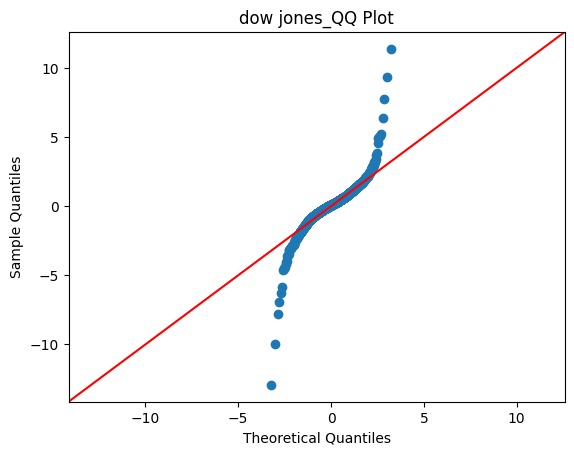

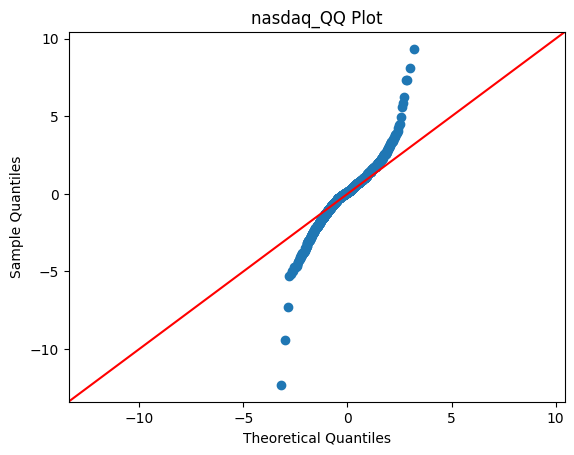

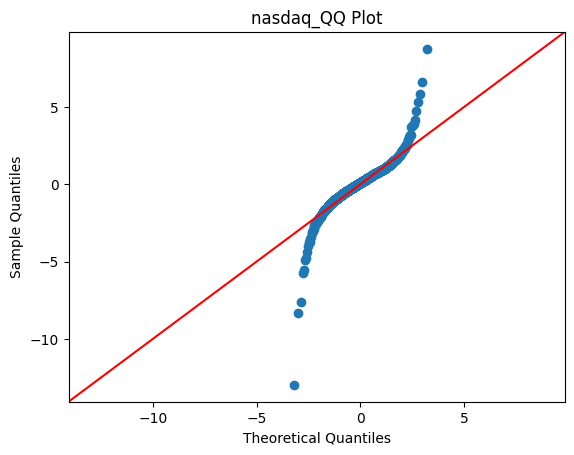

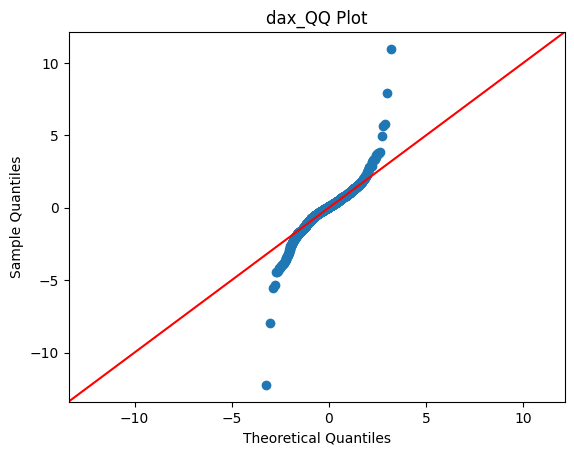

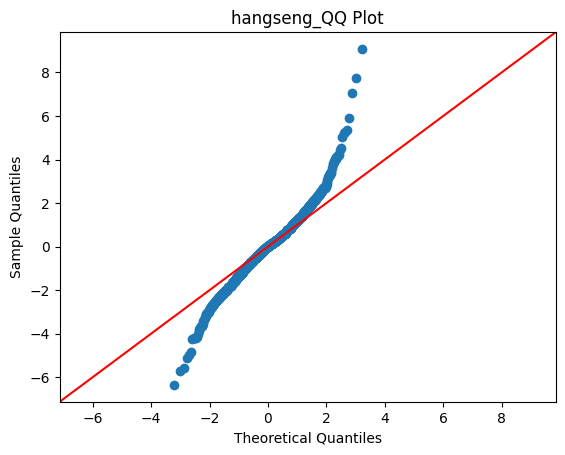

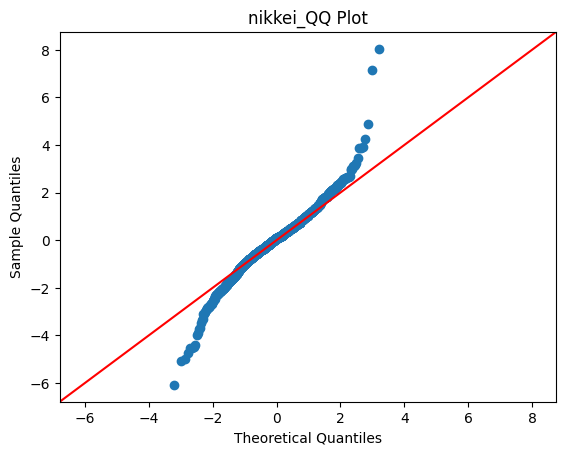

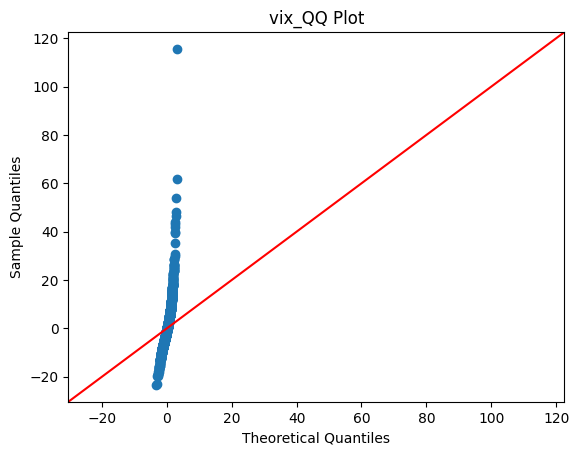

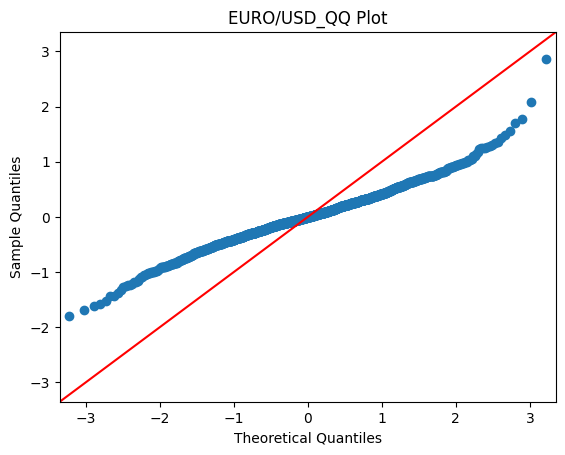

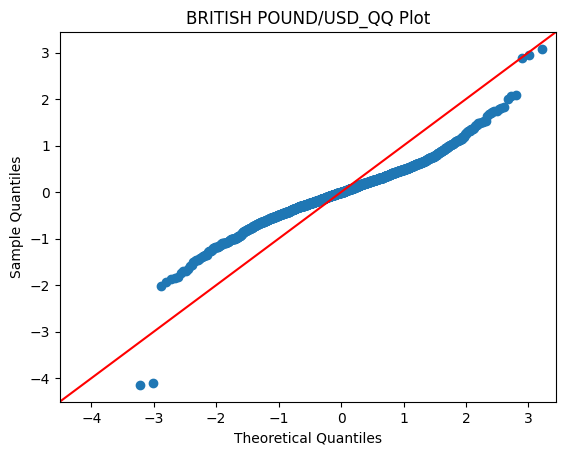

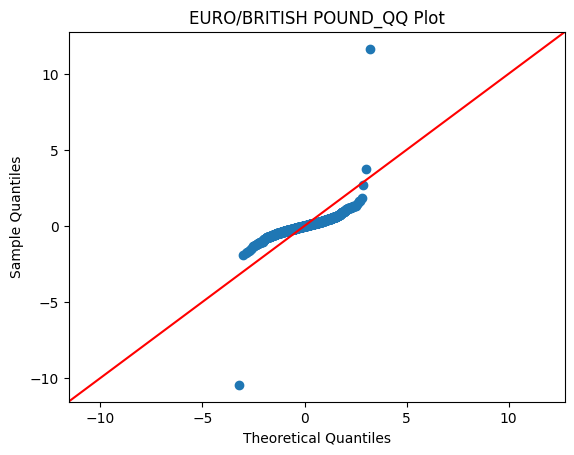

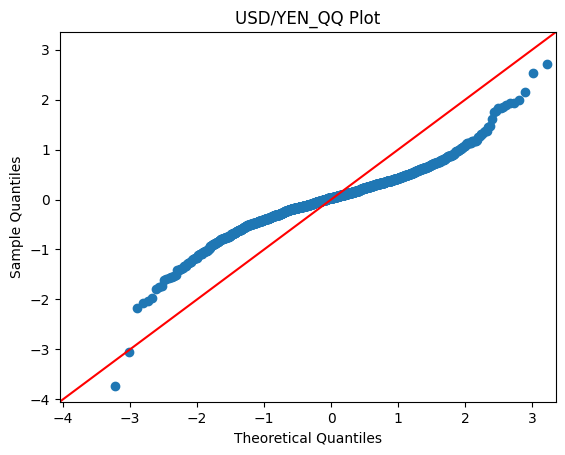

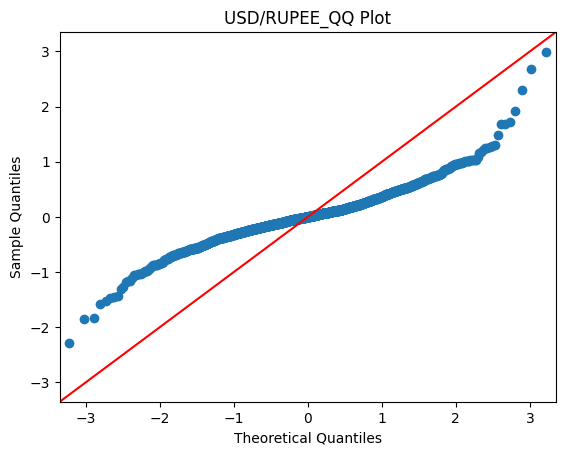

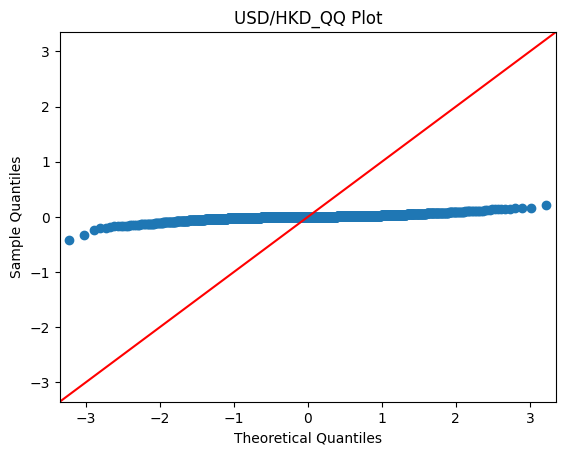

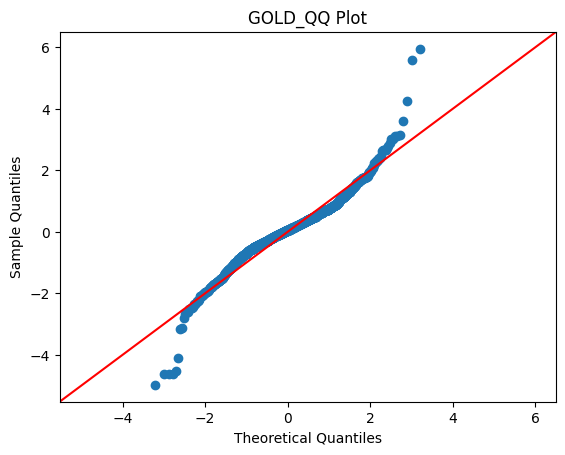

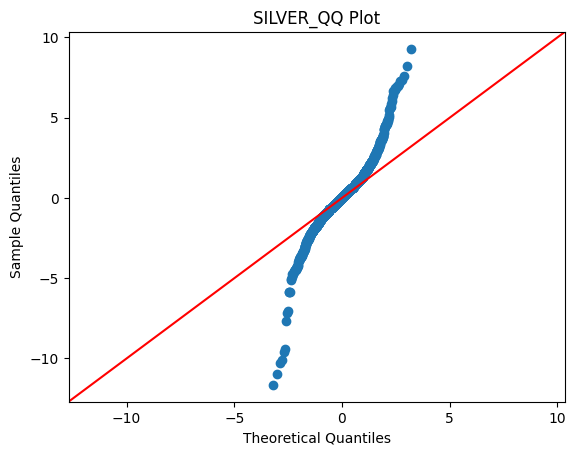

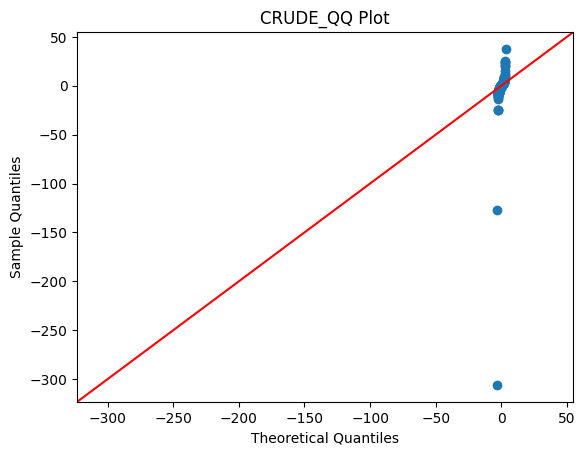

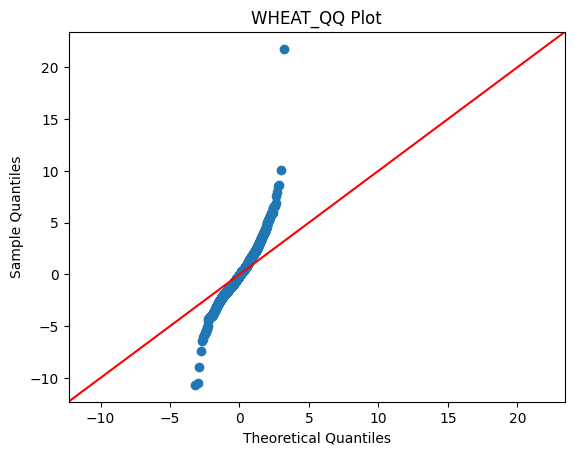

In [ ]:
#STOCKS
qq_plot("dow jones",dow["return"])
qq_plot("nasdaq",nasdaq["return"])
qq_plot("nasdaq",nifty["return"])
qq_plot("dax",dax["return"])
qq_plot("hangseng",hangseng["return"])
qq_plot("nikkei",nikkei["return"])
qq_plot("vix",vix["return"])
#CURRENCIES
qq_plot("EURO/USD",EUR_USD["return"])
qq_plot("BRITISH POUND/USD",GBP_USD["return"])
qq_plot("EURO/BRITISH POUND",EUR_GBP["return"])
qq_plot("USD/YEN",USD_JPY["return"])
qq_plot("USD/RUPEE",USD_INR["return"])
qq_plot("USD/HKD",USD_HKD["return"])
#COMMODITIES
qq_plot("GOLD",gold["return"])
qq_plot("SILVER",silver["return"])
qq_plot("CRUDE",crude["return"])
qq_plot("WHEAT",wheat["return"])

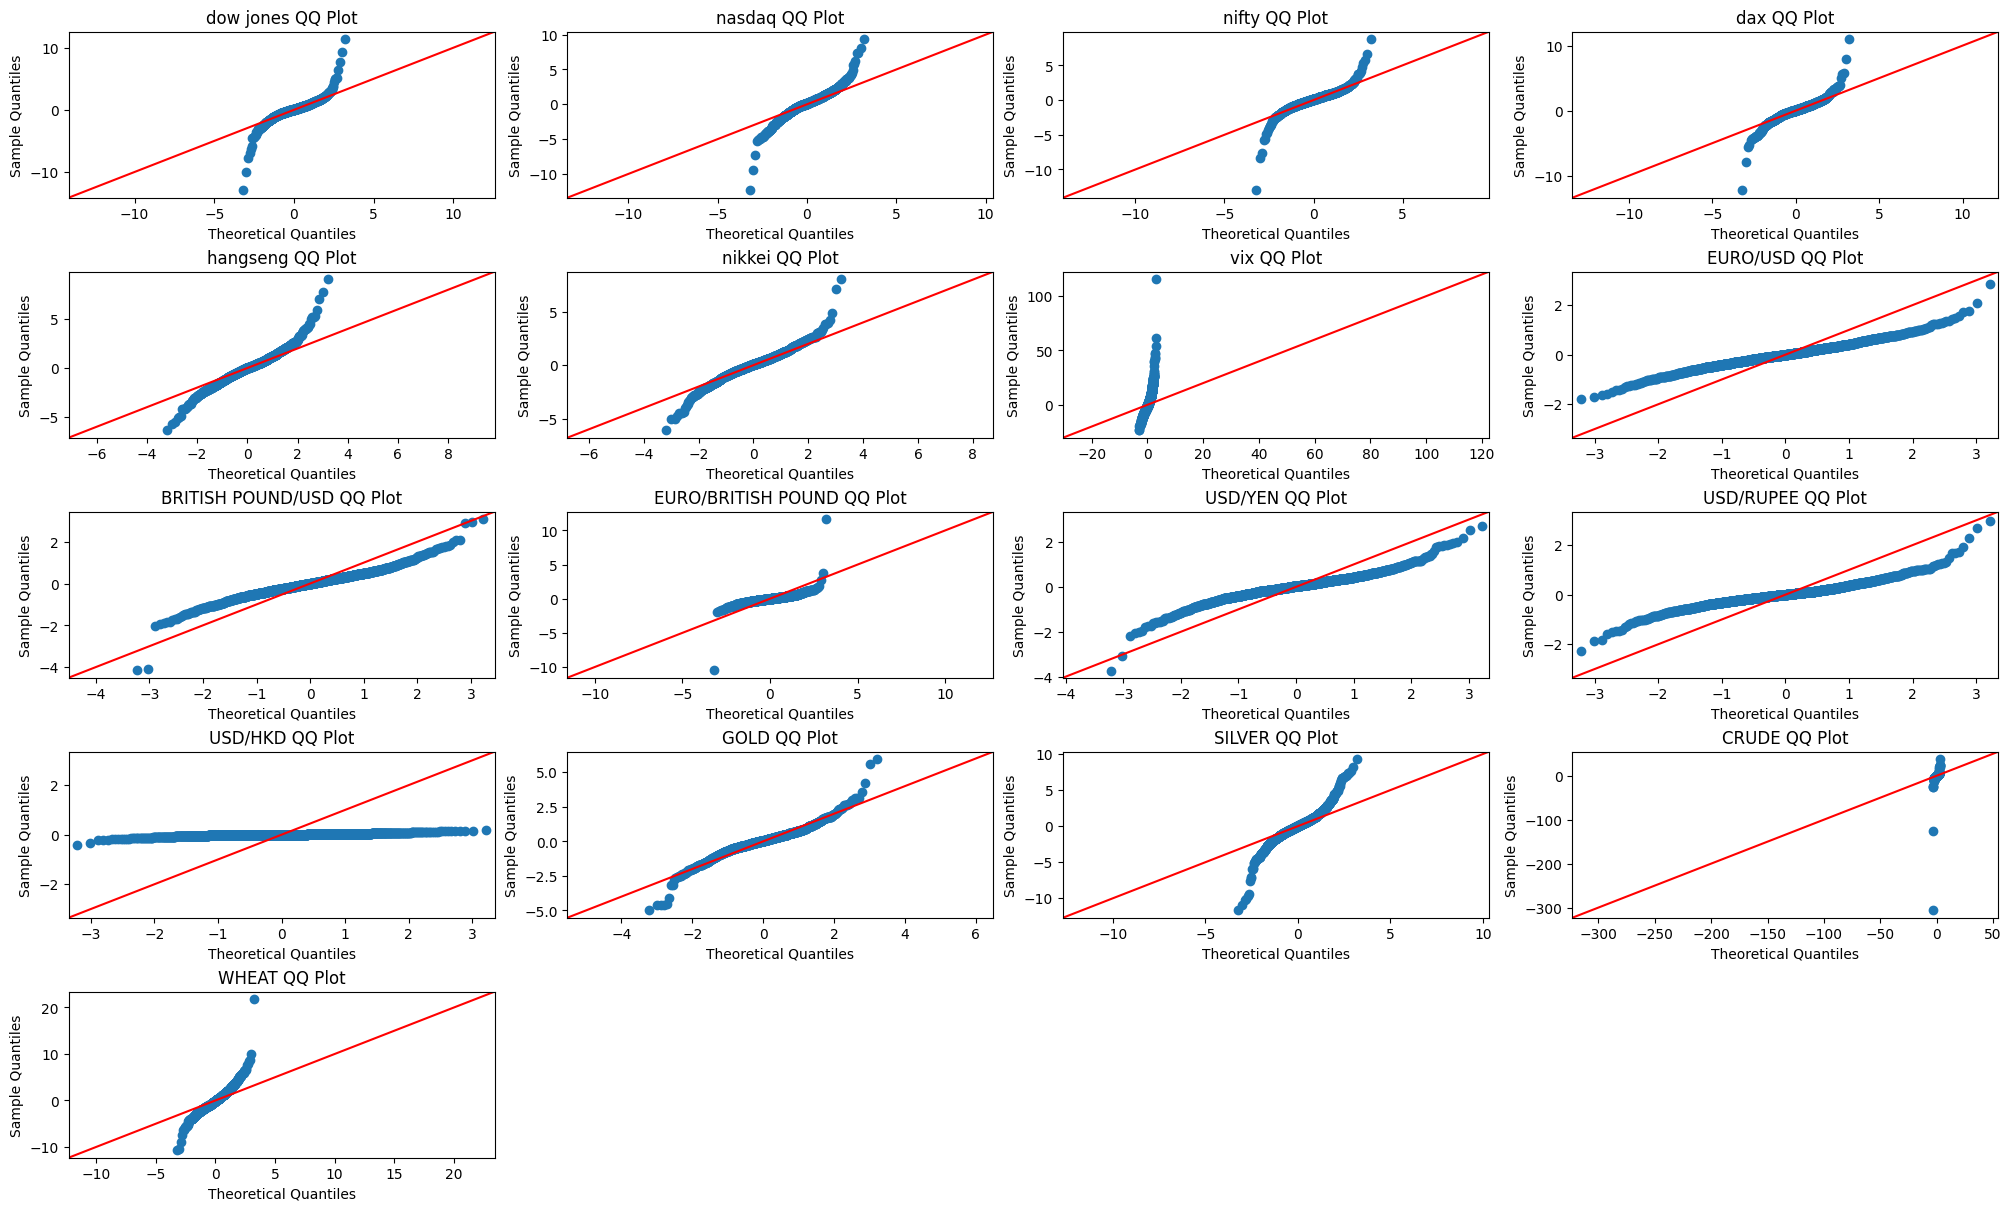

In [ ]:
def qq_plot(ax, data_name, data):
    sm.qqplot(data, line='45', ax=ax)
    ax.set_title(f'{data_name} QQ Plot')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

datasets = {
    "dow jones": dow["return"],
    "nasdaq": nasdaq["return"],
    "nifty": nifty["return"],
    "dax": dax["return"],
    "hangseng": hangseng["return"],
    "nikkei": nikkei["return"],
    "vix": vix["return"],
    "EURO/USD": EUR_USD["return"],
    "BRITISH POUND/USD": GBP_USD["return"],
    "EURO/BRITISH POUND": EUR_GBP["return"],
    "USD/YEN": USD_JPY["return"],
    "USD/RUPEE": USD_INR["return"],
    "USD/HKD": USD_HKD["return"],
    "GOLD": gold["return"],
    "SILVER": silver["return"],
    "CRUDE": crude["return"],
    "WHEAT": wheat["return"]
}
# Number of datasets
n_datasets = len(datasets)

# Define the subplot grid (adjust as needed)
n_cols = 4  # Number of columns in the subplot grid
n_rows = (n_datasets + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot QQ plots for each dataset
for i, (name, data) in enumerate(datasets.items()):
    qq_plot(axes[i], name, data)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the entire plot
plt.show()

In [ ]:
#SHAPIRO-WILKO TEST STOCKS
normality_test("dow jones",dow["return"])
normality_test("nasdaq",nasdaq["return"])
normality_test("nasdaq",nifty["return"])
normality_test("dax",dax["return"])
normality_test("hangseng",hangseng["return"])
normality_test("nikkei",nikkei["return"])
normality_test("vix",vix["return"])
#SHAPIRO-WILKO TEST CURRENCIES
normality_test("EURO/USD",EUR_USD["return"])
normality_test("POUND STERLING/USD",GBP_USD["return"])
normality_test("EURO/POUND STERLING",EUR_GBP["return"])
normality_test("USD/ JAPANESE YEN",USD_JPY["return"])
normality_test("USD/INDIAN RUPEE",USD_INR["return"])
normality_test("USD/HONG KONG DOLLAR",USD_HKD["return"])
#SHAPIRO-WILKO TEST COMMODITIES
normality_test("GOLD",gold["return"])
normality_test("SILVER",silver["return"])
normality_test("CRUDE",crude["return"])
normality_test("WHEAT",wheat["return"])


Shapiro-Wilk Test:
Test Statistic: 0.8450947403907776
p-value: 5.114815266689635e-36
dow jones does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9370728731155396
p-value: 9.174246237808878e-25
nasdaq does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.8631998896598816
p-value: 5.096567438808672e-34
nasdaq does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.8990282416343689
p-value: 1.605462724805045e-30
dax does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9701765179634094
p-value: 6.678557665824129e-17
hangseng does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9673322439193726
p-value: 1.1451174898731958e-17
nikkei does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.8385732173919678
p-value: 1.382264391865751e-36
vix does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.985041081905365
p-value: 1.1725411440399736e-11
EURO/USD does not look normal (reject H0

# **7**

In [ ]:
def rename_columns(data_name,data):
  data.columns = [[f"{data_name}_Open",f"{data_name}_High",f"{data_name}_Low",f"{data_name}_Close",f"{data_name}_AdjClose",f"{data_name}_Volume",f"{data_name}_return"]]
  return data
#stocks
renamed_dow = rename_columns("dow",dow)
renamed_nasdaq = rename_columns("nasdaq",nasdaq)
renamed_nifty = rename_columns("nifty",nifty)
renamed_dax = rename_columns("dax",dax)
renamed_hangseng = rename_columns("hangseng",hangseng)
renamed_nikkei = rename_columns("nikkei",nikkei)
renamed_vix = rename_columns("vix",vix)
#currenies
renamed_EUR_USD = rename_columns("EUR_USD",EUR_USD)
renamed_GBP_USD = rename_columns("GBP_USD",GBP_USD)
renamed_EUR_GBP = rename_columns("EUR_GBP",EUR_GBP)
renamed_USD_JPY = rename_columns("USD_JPY",USD_JPY)
renamed_USD_INR = rename_columns("USD_INR",USD_INR)
renamed_USD_HKD = rename_columns("USD_HKD",USD_HKD)
#commodities
renamed_gold = rename_columns("gold",gold)
renamed_silver = rename_columns("silver",silver)
renamed_crude = rename_columns("crude",crude)
renamed_wheat = rename_columns("wheat",wheat)
renamed_dow.head()


,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return
Date,,,,,,,
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000,0.397478
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000,0.611697
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000,0.880308
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000,-0.050874
2018-01-09,25312.050781,25439.779297,25308.410156,25385.800781,25385.800781,333490000,0.406600


In [ ]:
null_values = renamed_dax.isnull().sum()

# Display the number of null values for each column
print("Null values in the DataFrame:")
print(null_values)

Null values in the DataFrame:
dax_Open        0
dax_High        0
dax_Low         0
dax_Close       0
dax_AdjClose    0
dax_Volume      0
dax_return      0
dtype: int64


# **8**

In [ ]:

to_merge = [renamed_dow, renamed_nasdaq, renamed_nifty, renamed_dax, renamed_hangseng, renamed_nikkei, renamed_vix,renamed_EUR_USD, renamed_GBP_USD, renamed_EUR_GBP, renamed_USD_JPY,renamed_USD_INR,renamed_USD_HKD,renamed_gold, renamed_silver, renamed_crude, renamed_wheat]
# Merge DataFrames using reduce and merge

master = pd.concat(to_merge, axis=1, join="outer")


In [ ]:
master

,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,nasdaq_Low,...,crude_AdjClose,crude_Volume,crude_return,wheat_Open,wheat_High,wheat_Low,wheat_Close,wheat_AdjClose,wheat_Volume,wheat_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,7016.700195,...,61.630001,673859.0,2.087133,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000.0,0.611697,7089.500000,7098.049805,7072.379883,...,62.009998,654363.0,0.616578,435.75,436.00,431.00,434.00,434.00,58728.0,-0.458716
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000.0,0.880308,7105.740234,7137.040039,7097.080078,...,61.439999,563036.0,-0.919206,433.00,433.75,427.50,430.75,430.75,62551.0,-0.748848
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000.0,-0.050874,7135.379883,7161.350098,7124.089844,...,61.730000,616474.0,0.472007,430.25,432.25,425.75,427.75,427.75,71822.0,-0.696460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,15024.059570,...,75.570000,208715.0,2.732466,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436
2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,37656.519531,245530000.0,0.296152,15089.660156,15114.080078,15051.669922,...,74.110001,253323.0,-1.931982,636.00,637.50,619.25,623.00,623.00,38063.0,-2.082515


In [ ]:
master.shape

(1564, 119)

In [ ]:
master.columns

MultiIndex([(      'dow_Open',),
            (      'dow_High',),
            (       'dow_Low',),
            (     'dow_Close',),
            (  'dow_AdjClose',),
            (    'dow_Volume',),
            (    'dow_return',),
            (   'nasdaq_Open',),
            (   'nasdaq_High',),
            (    'nasdaq_Low',),
            ...
            ('crude_AdjClose',),
            (  'crude_Volume',),
            (  'crude_return',),
            (    'wheat_Open',),
            (    'wheat_High',),
            (     'wheat_Low',),
            (   'wheat_Close',),
            ('wheat_AdjClose',),
            (  'wheat_Volume',),
            (  'wheat_return',)],
           length=119)

In [ ]:
null_master = master.isnull().sum()

# Display the number of null values for each column
print("Null values in the DataFrame:")
print(null_master)

Null values in the DataFrame:
dow_Open          56
dow_High          56
dow_Low           56
dow_Close         56
dow_AdjClose      56
                  ..
wheat_Low         56
wheat_Close       56
wheat_AdjClose    56
wheat_Volume      56
wheat_return      56
Length: 119, dtype: int64


# **9**

In [ ]:
masterdata = master.ffill()

In [ ]:
null_data = masterdata.isnull().sum()

# Display the number of null values for each column
print("Null values in the DataFrame:")
print(null_data)

Null values in the DataFrame:
dow_Open          1
dow_High          1
dow_Low           1
dow_Close         1
dow_AdjClose      1
                 ..
wheat_Low         1
wheat_Close       1
wheat_AdjClose    1
wheat_Volume      1
wheat_return      1
Length: 119, dtype: int64


In [ ]:
masterdata

,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,nasdaq_Low,...,crude_AdjClose,crude_Volume,crude_return,wheat_Open,wheat_High,wheat_Low,wheat_Close,wheat_AdjClose,wheat_Volume,wheat_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,7016.700195,...,61.630001,673859.0,2.087133,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000.0,0.611697,7089.500000,7098.049805,7072.379883,...,62.009998,654363.0,0.616578,435.75,436.00,431.00,434.00,434.00,58728.0,-0.458716
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000.0,0.880308,7105.740234,7137.040039,7097.080078,...,61.439999,563036.0,-0.919206,433.00,433.75,427.50,430.75,430.75,62551.0,-0.748848
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000.0,-0.050874,7135.379883,7161.350098,7124.089844,...,61.730000,616474.0,0.472007,430.25,432.25,425.75,427.75,427.75,71822.0,-0.696460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,37349.269531,37534.519531,37268.878906,37385.968750,37385.968750,252970000.0,-0.049146,15006.179688,15047.190430,14927.120117,...,73.559998,222600.0,-0.446612,612.50,618.25,610.75,616.25,616.25,26134.0,0.612245
2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,15024.059570,...,75.570000,208715.0,2.732466,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436
2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,37656.519531,245530000.0,0.296152,15089.660156,15114.080078,15051.669922,...,74.110001,253323.0,-1.931982,636.00,637.50,619.25,623.00,623.00,38063.0,-2.082515


In [ ]:
MASTERDATA = master.bfill()

In [ ]:
n_data = MASTERDATA.isnull().sum()

# Display the number of null values for each column
print("Null values in the DataFrame:")
print(n_data)

Null values in the DataFrame:
dow_Open          0
dow_High          0
dow_Low           0
dow_Close         0
dow_AdjClose      0
                 ..
wheat_Low         0
wheat_Close       0
wheat_AdjClose    0
wheat_Volume      0
wheat_return      0
Length: 119, dtype: int64


In [ ]:
MASTERDATA

,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,nasdaq_Low,...,crude_AdjClose,crude_Volume,crude_return,wheat_Open,wheat_High,wheat_Low,wheat_Close,wheat_AdjClose,wheat_Volume,wheat_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,7016.700195,...,61.630001,673859.0,2.087133,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,7016.700195,...,61.630001,673859.0,2.087133,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000.0,0.611697,7089.500000,7098.049805,7072.379883,...,62.009998,654363.0,0.616578,435.75,436.00,431.00,434.00,434.00,58728.0,-0.458716
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000.0,0.880308,7105.740234,7137.040039,7097.080078,...,61.439999,563036.0,-0.919206,433.00,433.75,427.50,430.75,430.75,62551.0,-0.748848
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000.0,-0.050874,7135.379883,7161.350098,7124.089844,...,61.730000,616474.0,0.472007,430.25,432.25,425.75,427.75,427.75,71822.0,-0.696460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,15024.059570,...,75.570000,208715.0,2.732466,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436
2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,15024.059570,...,75.570000,208715.0,2.732466,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436
2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,37656.519531,245530000.0,0.296152,15089.660156,15114.080078,15051.669922,...,74.110001,253323.0,-1.931982,636.00,637.50,619.25,623.00,623.00,38063.0,-2.082515


# **10**

In [ ]:
MASTERDATA['month'] = MASTERDATA.index.month

# **11**

In [ ]:
MASTERDATA['quarter'] = MASTERDATA.index.quarter

# **12**

In [ ]:
MASTERDATA['year'] = MASTERDATA.index.year

# **13**

In [ ]:
MASTERDATA

,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,nasdaq_Low,...,wheat_Open,wheat_High,wheat_Low,wheat_Close,wheat_AdjClose,wheat_Volume,wheat_return,month,quarter,year
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,7016.700195,...,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701,1,1,2018
2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,7016.700195,...,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701,1,1,2018
2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000.0,0.611697,7089.500000,7098.049805,7072.379883,...,435.75,436.00,431.00,434.00,434.00,58728.0,-0.458716,1,1,2018
2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000.0,0.880308,7105.740234,7137.040039,7097.080078,...,433.00,433.75,427.50,430.75,430.75,62551.0,-0.748848,1,1,2018
2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000.0,-0.050874,7135.379883,7161.350098,7124.089844,...,430.25,432.25,425.75,427.75,427.75,71822.0,-0.696460,1,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,15024.059570,...,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436,12,4,2023
2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,15024.059570,...,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436,12,4,2023
2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,37656.519531,245530000.0,0.296152,15089.660156,15114.080078,15051.669922,...,636.00,637.50,619.25,623.00,623.00,38063.0,-2.082515,12,4,2023


In [ ]:
MASTERDATA.to_csv("MASTERDATA_2024.csv", index=False)
from google.colab import files
files.download("MASTERDATA_2024.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>